In [5]:
# script to get and plot TTS for rf11 with varying bl conditions
# date created: 3/26/2020
# author: sofia chelpon

In [6]:
############################ PREP WORKSPACE ############################

In [1]:
import numpy as np 
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
%config inlinebackend.figure_format='retina'

# import my TTS module, need to add path to folder
import sys
sys.path.insert(1, '/Volumes/scdrive2/TTS_2020/base_tts_code/')
import tts_mod

In [2]:
# read in ratios dataframe
path = "./contrast_ratios_rf11_temporal.pkl"
contrast_ratios = pd.read_pickle(path)
ratios_sort = contrast_ratios.sort_values(['BL_tau'])
ratios_sort.head()

,Instrument,Trace_Gas,BL_tau,TROPO_tau,UT_tau,RF11_CampAvg,RF11_RF11,RF11_9days
40,TOGA,Acetaldehyde,0.289063,0.365920,0.376967,0.977208,1.010124,0.837609
8,AWAS,C2H6S_Dimethyl_sulfide,0.955122,1.689426,3.279163,0.005929,0.012411,0.005964
5,AWAS,C5H12_nPentane,1.214449,2.312606,4.723079,0.072798,1.291667,0.235562
4,AWAS,C4H10_nButane,1.959376,3.813463,8.057685,0.139745,1.128682,0.349258
41,TOGA,n_Butane,1.959376,3.813463,8.057685,0.330500,0.254290,0.361579


In [3]:
# tau, same for all 
tau = ratios_sort['BL_tau'].values
# get gf inputs, same for all 
t, exp_decay_matrix, LT = tts_mod.prep_for_tts(tau)

In [4]:
############################ GET TTS OUTPUTS FOR EA. CASE ############################

In [5]:
# --------------- ver 1: UT = RF08, BL = CAMPAIGN AVG.
utbl_cavg = ratios_sort['RF11_CampAvg']

# get tts 
my_mustar_cavg, my_r2_cavg, my_gf_cavg, my_t_cavg, mean_age_cavg, \
    mode_age_cavg, best_k_cavg = tts_mod.get_tts(utbl_cavg, tau, t, exp_decay_matrix, LT)

In [6]:
# --------------- ver 2: UT = RF08, BL = RF08
utbl_rf11 = ratios_sort['RF11_RF11']

# get tts 
my_mustar_rf11, my_r2_rf11, my_gf_rf11, my_t_rf11, mean_age_rf11, \
    mode_age_rf11, best_k_rf11 = tts_mod.get_tts(utbl_rf11, tau, t, exp_decay_matrix, LT)

In [7]:
# --------------- ver 3: UT = RF08, BL = RF06, 07, 08 (9 days prior)
utbl_9days = ratios_sort['RF11_9days']

# get tts 
my_mustar_9days, my_r2_9days, my_gf_9days, my_t_9days, mean_age_9days, \
    mode_age_9days, best_k_9days = tts_mod.get_tts(utbl_9days, tau, t, exp_decay_matrix, LT)

In [8]:
############################ PLOT TTS OUTPUTS FOR EA. CASE ############################

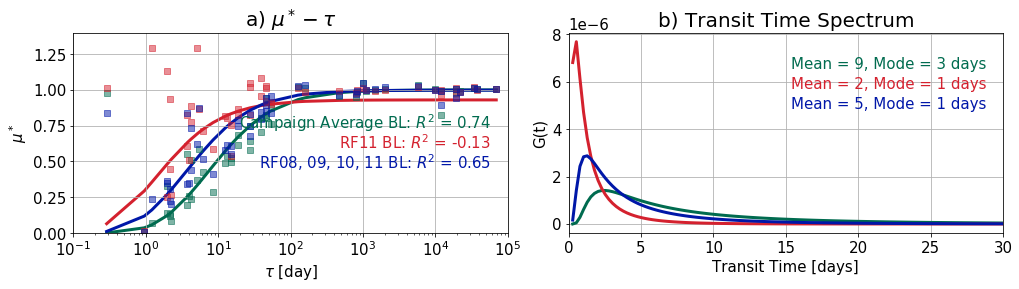

In [9]:
import imp
imp.reload(tts_mod)

# --------------- start plot with campaign avg bl
title_str = 'Campaign Average BL: '
my_color = [0, 0.42, 0.31] # bottle green 
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

fig, my_ax, width, height = tts_mod.plot_tts(tau, my_mustar_cavg, utbl_cavg, my_r2_cavg, 
                                        my_gf_cavg, my_t_cavg, mean_age_cavg, mode_age_cavg, 
                                        my_color, overplot, add_scatter, add_r2, 
                                        add_meanmode, my_ax, width, height, title_str)

# --------------- add rf08 bl case
title_str = 'RF11 BL: '
my_color = [0.83, 0.13, 0.18] # amranth red 
overplot = 1
add_scatter = 1
add_r2 = 1 
add_meanmode = 1

tts_mod.plot_tts(tau, my_mustar_rf11, utbl_rf11, my_r2_rf11,  
                                        my_gf_rf11, my_t_rf11, mean_age_rf11, mode_age_rf11, 
                                        my_color, overplot, add_scatter, add_r2, 
                                        add_meanmode, my_ax, width, height, title_str)

# --------------- add 9 days prior bl case
title_str = 'RF08, 09, 10, 11 BL: '
my_color = [0, 0.09, 0.66] #pantone blue
overplot = 2
add_scatter = 1
add_r2 = 1 
add_meanmode = 1

tts_mod.plot_tts(tau, my_mustar_9days, utbl_9days, my_r2_9days, 
                                        my_gf_9days, my_t_9days, mean_age_9days, mode_age_9days, 
                                        my_color, overplot, add_scatter, add_r2, 
                                        add_meanmode, my_ax, width, height, title_str)
my_ax[0].set_ylim([0, 1.4])
# --------------- save figure 
fig.savefig('./tts_vary_bl_rf11_temporal.pdf')  

In [10]:
# which ones are >1 ?
ratios_sort2 = contrast_ratios.sort_values(['RF11_RF11'], ascending = False)
ratios_sort2[ratios_sort2['BL_tau'] < 10**1]


,Instrument,Trace_Gas,BL_tau,TROPO_tau,UT_tau,RF11_CampAvg,RF11_RF11,RF11_9days
45,TOGA,Methanol,5.160001,9.567463,20.040000,0.369928,1.295028,0.621924
5,AWAS,C5H12_nPentane,1.214449,2.312606,4.723079,0.072798,1.291667,0.235562
4,AWAS,C4H10_nButane,1.959376,3.813463,8.057685,0.139745,1.128682,0.349258
40,TOGA,Acetaldehyde,0.289063,0.365920,0.376967,0.977208,1.010124,0.837609
3,AWAS,C4H10_Isobutane,2.175570,4.031311,7.903592,0.133441,0.933333,0.308013
2,AWAS,C3H8_Propane,4.214557,9.062693,22.450000,0.235547,0.886752,0.437764
1,AWAS,C2H2_Ethyne,5.422335,9.603369,18.712675,0.587254,0.864908,0.874613
6,AWAS,C6H6_Benzene,3.755136,6.447323,11.947207,0.550537,0.821719,0.837547
44,TOGA,C3H8,4.214557,9.062693,22.450000,0.510844,0.776687,0.732588
28,AWAS,C6H5Cl_Chlorobenzene,6.247813,11.592622,16.370000,0.423228,0.715441,0.514201
